In [118]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [119]:
import re
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91933\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91933\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [121]:
df = pd.read_csv("mail_data.csv") 

In [122]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [124]:
print('Initial shape:', df.shape)
df.dropna(inplace=True)
print('After dropping nulls:', df.shape)

Initial shape: (5572, 2)
After dropping nulls: (5572, 2)


In [125]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [126]:
df.shape

(5572, 2)

In [127]:
# label spam mail as 1(true);  ham mail as 0(not spam - false);
encoder = LabelEncoder()
df['Category'] = encoder.fit_transform(df['Category'])
print('Label mapping:', dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

Label mapping: {'ham': 0, 'spam': 1}


In [128]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [129]:
def cleaning(text):
    text = text.lower()
    text = re.sub(r'https?://\S+|www.\.\S+', '', text)
    text = re.sub(r'[^a-z\s]','', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Message'] = df['Message'].apply(cleaning)

In [130]:
df['Message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                nah dont think go usf life around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                           pity mood soany suggestion
5570    guy bitching acted like id interested buying s...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

C:\Users\91933\AppData\Local\Temp\ipykernel_21908\4117347547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='Set2')


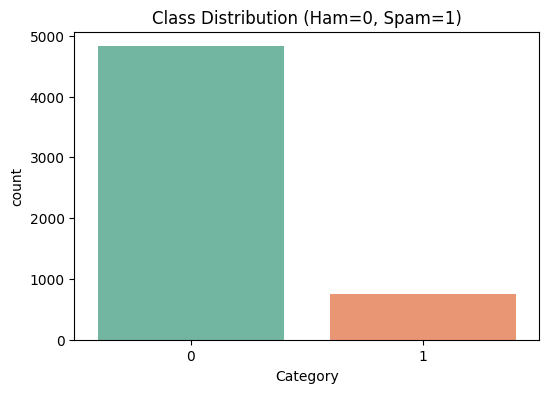

In [131]:
#EDA
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df, palette='Set2')
plt.title('Class Distribution (Ham=0, Spam=1)')
plt.show()

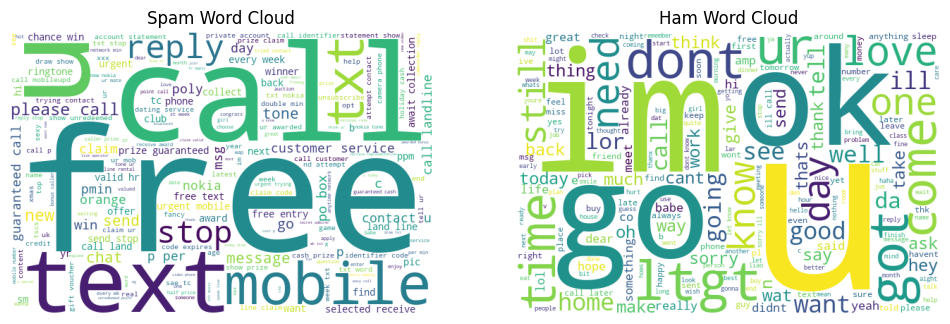

In [132]:
# WordClouds
spam_text = ' '.join(df[df['Category']==1]['Message'])
ham_text = ' '.join(df[df['Category']==0]['Message'])


plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(spam_text))
plt.title('Spam Word Cloud')
plt.axis('off')


plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(ham_text))
plt.title('Ham Word Cloud')
plt.axis('off')
plt.show()

In [105]:
# separating the data as texts and label

X = df['Message']
Y = df['Category']

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [107]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(3900,)
(1672,)


### Feature Extraction

In [108]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000, stop_words='english', lowercase=True)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


===== Logistic Regression =====
Accuracy: 0.9629186602870813
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1440
           1       0.99      0.74      0.85       232

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.96      0.96      0.96      1672



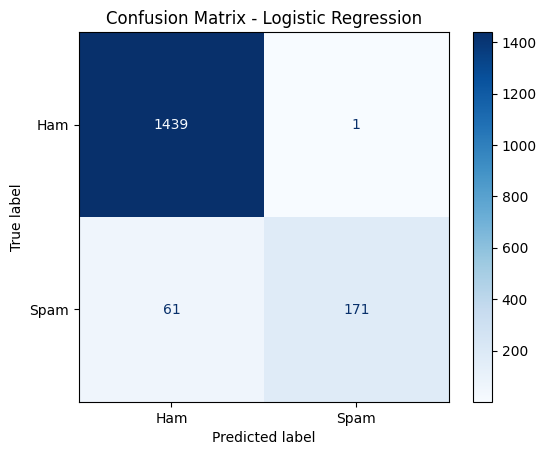


===== Naive Bayes =====
Accuracy: 0.9671052631578947
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1440
           1       1.00      0.76      0.87       232

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



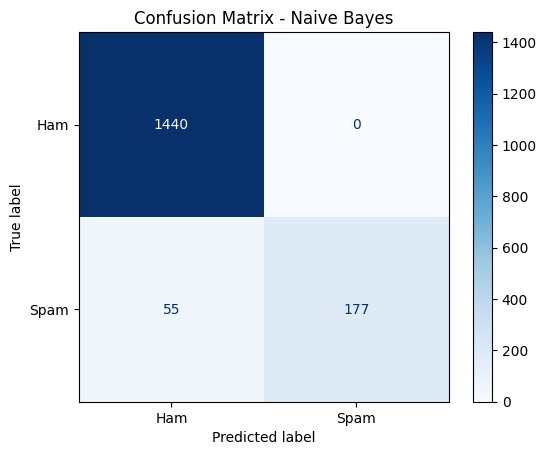


===== SVM (Linear) =====
Accuracy: 0.9844497607655502
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1440
           1       0.99      0.90      0.94       232

    accuracy                           0.98      1672
   macro avg       0.99      0.95      0.97      1672
weighted avg       0.98      0.98      0.98      1672



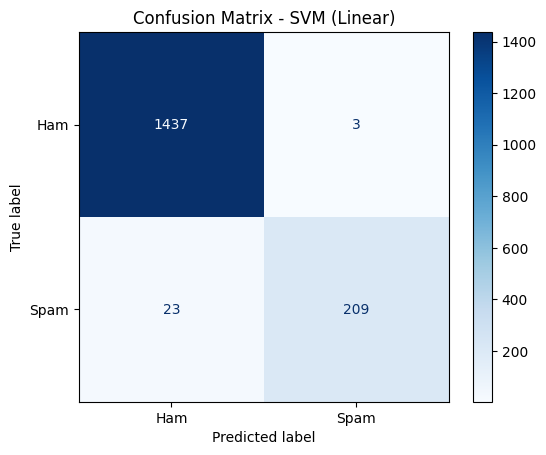

In [ ]:
models = {
'Logistic Regression': LogisticRegression(max_iter=1000),
'Naive Bayes': MultinomialNB(),
'SVM (Linear)': SVC(kernel='linear', probability=True)
}


results = {}


for name, model in models.items():
    model.fit(X_train_tfidf, Y_train)
    preds = model.predict(X_test_tfidf)
    acc = accuracy_score(Y_test, preds)
    results[name] = acc
    print(f'\n===== {name} =====')
    print('Accuracy:', acc)
    print('Classification Report:\n', classification_report(Y_test, preds))
    # disp = ConfusionMatrixDisplay(confusion_matrix(Y_test, preds), display_labels=['Ham','Spam'])
    # disp.plot(cmap='Blues')
    # plt.title(f'Confusion Matrix - {name}')
    # plt.show()

                 Model  Accuracy
2         SVM (Linear)  0.984450
1          Naive Bayes  0.967105
0  Logistic Regression  0.962919


C:\Users\91933\AppData\Local\Temp\ipykernel_21908\4214977072.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=result_df, palette='viridis')


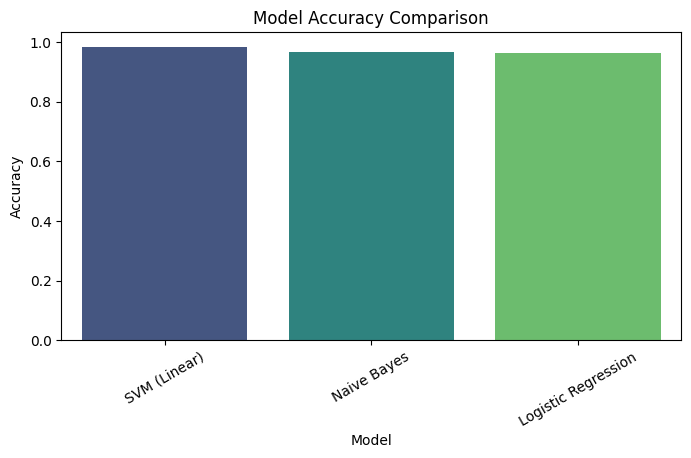

In [114]:
result_df = pd.DataFrame(list(results.items()), columns=['Model','Accuracy']).sort_values(by='Accuracy', ascending=False)
print(result_df)

plt.figure(figsize=(8,4))
sns.barplot(x='Model', y='Accuracy', data=result_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=30)
plt.show()

### Building a Predictive System

In [115]:
#sample example
sample_mail = ["Congratulations! You've won a free iPhone. Click here to claim.",
"Hey, are we still meeting for lunch tomorrow?"]

sample_features = vectorizer.transform(sample_mail)

sample_preds = models['Naive Bayes'].predict(sample_features)

for mail, label in zip(sample_mail, sample_preds):
  print(f'\nMail: {mail}\nPrediction: {"Spam" if label==1 else "Ham"}')


Mail: Congratulations! You've won a free iPhone. Click here to claim.
Prediction: Spam

Mail: Hey, are we still meeting for lunch tomorrow?
Prediction: Ham


In [ ]:
import pickle

# Save the best model and vectorizer
pickle.dump(models['SVM (Linear)'], open('spam_model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
